In [1]:
# %set_env CUDA_VISIBLE_DEVICES=7
# %load_ext cudf.pandas
import pandas as pd

from unibench.benchmarks_zoo import list_benchmarks
from unibench.models_zoo.registry import list_models
from unibench.output import OutputHandler
import seaborn as sns
import matplotlib.pyplot as plt

models = ["llava_1_5_7b", "llava_1_5_13b"]
datasets = list_benchmarks("all")
outputhandler = OutputHandler()
print(pd)

/data/home/haideraltahan/anaconda3/envs/clip/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<module 'pandas' from '/data/home/haideraltahan/anaconda3/envs/clip/lib/python3.11/site-packages/pandas/__init__.py'>


In [2]:
outputhandler.load_all_csv(
    model_name=models,
    benchmark_name=datasets,
)

File not found:  /data/home/haideraltahan/.cache/unibench/outputs/llava_1_5_7b/winoground.f
File not found:  /data/home/haideraltahan/.cache/unibench/outputs/llava_1_5_13b/kitti_distance.f
File not found:  /data/home/haideraltahan/.cache/unibench/outputs/llava_1_5_13b/winoground.f


In [3]:
results = outputhandler.query(
    outputhandler._model_csv, **{"benchmark_name": datasets, "model_name": models}
)

In [4]:
df_mean = results.groupby(["model_name", "benchmark_name"]).correctness.mean()
df_sem = results.groupby(["model_name", "benchmark_name"]).correctness.sem()

/tmp/ipykernel_338805/1012093812.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(


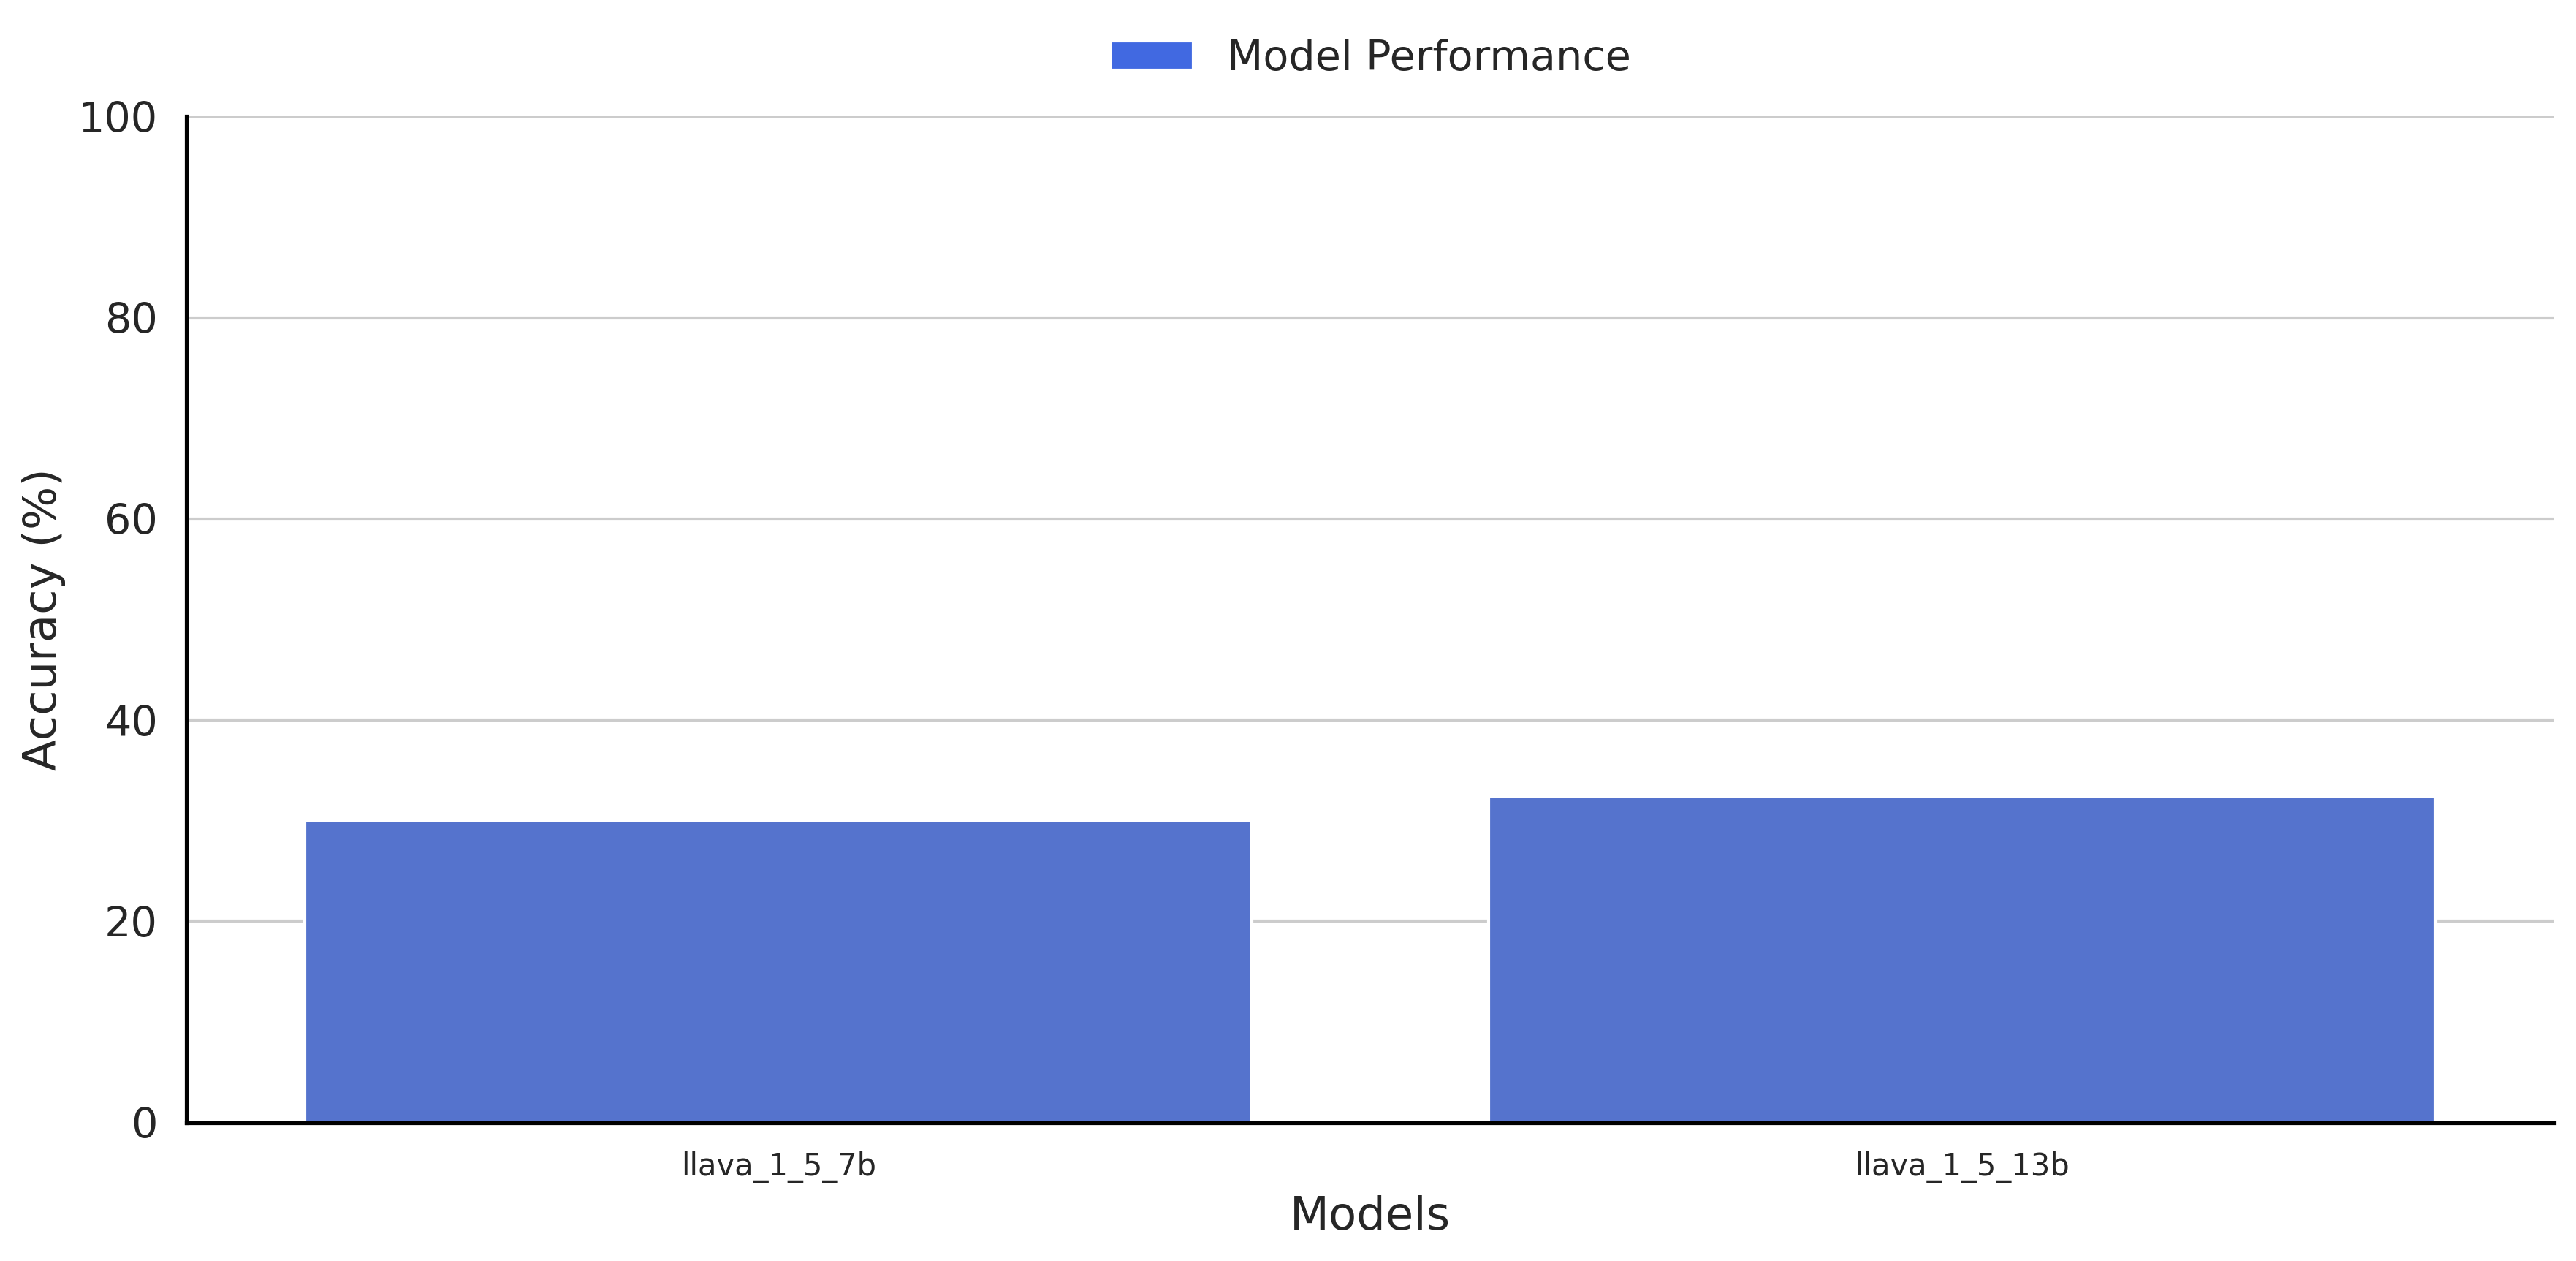

In [5]:
sns.set(font_scale=1.25)
sns.set_style("whitegrid")
fig, axs = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(12, 6), dpi=300)

order = list(
    (
        df_mean.reset_index()
        .groupby("model_name")
        .correctness.median()
        .sort_values()
        .index
    )
)
# order.append("2 Layer MLP")

m = df_mean.reset_index().groupby("model_name").correctness.mean() * 100
s = df_sem.reset_index().groupby("model_name").correctness.mean() * 100

sns.set_style(
    "whitegrid",
    rc={"ytick.left": True, "axes.grid": True},
)


ax1 = sns.barplot(
    x=list(m.keys()),
    y=list(m.values),
    palette=[
        "royalblue" if "2 Layer MLP" not in x else "forestgreen" for x in list(m.keys())
    ],
    errorbar=None,
    order=order,
    ax=axs,
)

# axs = sns.barplot(
#     x=order,
#     y=[10] * len(order),
#     errorbar=None,
#     order=order,
#     ax=axs,
#     color="silver",
# )

for _, s in ax1.spines.items():
    s.set_color("black")

axs.set_ylim(0, 100)
sns.despine(ax=axs)

from matplotlib.patches import Patch

lgd = plt.legend(
    title=None,
    ncol=3,
    loc="lower center",
    bbox_to_anchor=(0.5, 1),
    handles=[
        Patch(
            facecolor="royalblue",
            label="Model Performance",
        ),
        # Patch(
        #     facecolor="forestgreen",
        #     label="2 Layer MLP",
        # ),
    ],
    frameon=False,
)

# axs.axhline(y=10, linestyle="--", color="silver")
# axs.text(63, 10, 'Chance', fontsize=10, va='center', ha='center', backgroundcolor='w')
# axs.set_xticks(
#     [x + 0.4 for x in axs.get_xticks()],
#     [x.replace("_", " ").title() for x in order],
#     rotation=90,
#     ha="right",
# )
axs.tick_params(axis="x", which="major", labelsize=10)

axs.set_xlabel("Models")
axs.set_ylabel("Accuracy (%)")
plt.tight_layout()
# plt.savefig("pngs/results_summary_mnist.png", dpi=300, bbox_inches="tight")

In [6]:
df = outputhandler._model_csv

df = outputhandler.query(df=df, **{"benchmark_name": datasets, "model_name": models})
benchmark_mappings = outputhandler._get_benchmark_mappings("benchmark_type")
df["benchmark_type"] = df["benchmark_name"].map(benchmark_mappings)
df = (
    df.groupby(["model_name", "benchmark_name", "benchmark_type"])["correctness"]
    .mean()
    .reset_index()
)

df = df.groupby(["model_name", "benchmark_type"])["correctness"].mean().reset_index()
print(
    df.pivot(
        index="model_name", columns="benchmark_type", values="correctness"
    ).to_markdown()
)

benchmark_type  corruption  non-natural images  object recognition  reasoning  \
model_name                                                                      
llava_1_5_13b     0.305071            0.501061            0.362101   0.113452   
llava_1_5_7b      0.289530            0.506106            0.320092   0.122355   

benchmark_type  relation  robustness   texture  
model_name                                      
llava_1_5_13b   0.414822    0.248784  0.340426  
llava_1_5_7b    0.415350    0.228330  0.282979  
